In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes.data')

In [4]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)

# LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred1 = logreg.predict(xtest)

In [11]:
from sklearn.metrics import accuracy_score

print(f"Accuracy -: {accuracy_score(ytest, ypred1)}")

Accuracy -: 0.7552083333333334


# classification_report

In [12]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred1))


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       128
           1       0.68      0.50      0.58        64

    accuracy                           0.76       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.75      0.76      0.74       192



# confusion_matrix

In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest, ypred1))

[[113  15]
 [ 32  32]]


In [14]:
yproba=logreg.predict_proba(xtest)[:,-1]
yproba

array([0.64335394, 0.06273572, 0.40907117, 0.0749569 , 0.10309289,
       0.41373797, 0.04313769, 0.33187866, 0.27891301, 0.00832606,
       0.4130517 , 0.00440661, 0.08518281, 0.08922684, 0.10680889,
       0.41871777, 0.40870621, 0.30058067, 0.11779952, 0.11020149,
       0.0071205 , 0.4237764 , 0.36585625, 0.21840635, 0.12994024,
       0.05011273, 0.16810875, 0.04394387, 0.09792233, 0.90533451,
       0.40519579, 0.16365998, 0.25598845, 0.69762419, 0.03695046,
       0.68725391, 0.09902004, 0.4310413 , 0.71781586, 0.1678947 ,
       0.33925807, 0.30044323, 0.3618221 , 0.20522836, 0.06245758,
       0.27594546, 0.02544598, 0.13917159, 0.07841178, 0.36471888,
       0.13502213, 0.14797256, 0.14258372, 0.76089973, 0.19992288,
       0.11628423, 0.10428306, 0.85826172, 0.26776487, 0.49895951,
       0.51284453, 0.51421745, 0.05274335, 0.45785415, 0.19341454,
       0.09932383, 0.25698253, 0.39052897, 0.46373315, 0.56164802,
       0.39674369, 0.66168913, 0.69518158, 0.01540296, 0.67524

In [15]:
print(f'Actual values : {ytest[:25]}')
print(f"predict values : {ypred1[:25]}")

Actual values : 285    0
101    0
581    0
352    0
632    0
472    0
233    0
385    1
556    0
59     0
755    0
341    0
445    0
614    0
371    0
355    1
19     0
710    0
430    0
117    0
493    0
218    1
159    0
666    1
553    0
Name: 1, dtype: int64
predict values : [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
print(f"Actual values : {ytest[25:51]}")
print(f"predict values : {ypred1[25:51]}")

Actual values : 628    0
620    0
238    0
639    0
758    1
577    0
533    0
134    0
752    1
202    0
688    1
759    0
85     0
403    1
558    0
311    1
277    0
47     1
187    1
224    0
90     0
8      1
399    1
678    0
400    0
81     0
Name: 1, dtype: int64
predict values : [0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
yproba=logreg.predict_proba(xtest)[:,-1]
yproba

array([0.64335394, 0.06273572, 0.40907117, 0.0749569 , 0.10309289,
       0.41373797, 0.04313769, 0.33187866, 0.27891301, 0.00832606,
       0.4130517 , 0.00440661, 0.08518281, 0.08922684, 0.10680889,
       0.41871777, 0.40870621, 0.30058067, 0.11779952, 0.11020149,
       0.0071205 , 0.4237764 , 0.36585625, 0.21840635, 0.12994024,
       0.05011273, 0.16810875, 0.04394387, 0.09792233, 0.90533451,
       0.40519579, 0.16365998, 0.25598845, 0.69762419, 0.03695046,
       0.68725391, 0.09902004, 0.4310413 , 0.71781586, 0.1678947 ,
       0.33925807, 0.30044323, 0.3618221 , 0.20522836, 0.06245758,
       0.27594546, 0.02544598, 0.13917159, 0.07841178, 0.36471888,
       0.13502213, 0.14797256, 0.14258372, 0.76089973, 0.19992288,
       0.11628423, 0.10428306, 0.85826172, 0.26776487, 0.49895951,
       0.51284453, 0.51421745, 0.05274335, 0.45785415, 0.19341454,
       0.09932383, 0.25698253, 0.39052897, 0.46373315, 0.56164802,
       0.39674369, 0.66168913, 0.69518158, 0.01540296, 0.67524

[]

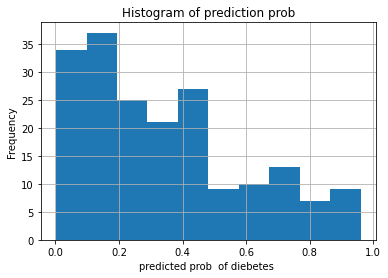

In [18]:
plt.hist(yproba)
plt.title("Histogram of prediction prob")
plt.xlabel("predicted prob  of diebetes ")
plt.ylabel("Frequency")
plt.grid(True)
plt.plot()

In [19]:
from sklearn.preprocessing import binarize

In [20]:
ypred=binarize([yproba],threshold=0.30)[0]

In [21]:
print(f'Actual values : {ytest[:25]}')
print(f"predict values : {(ypred1[:25].astype(int))}")

Actual values : 285    0
101    0
581    0
352    0
632    0
472    0
233    0
385    1
556    0
59     0
755    0
341    0
445    0
614    0
371    0
355    1
19     0
710    0
430    0
117    0
493    0
218    1
159    0
666    1
553    0
Name: 1, dtype: int64
predict values : [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# auc roc curve

In [22]:
from sklearn.metrics import roc_curve

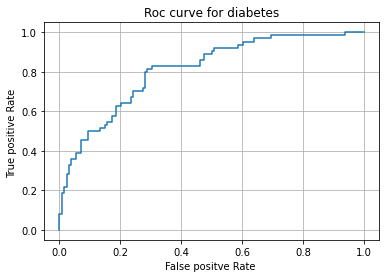

In [23]:
fpr,tpr,thres=roc_curve(ytest,yproba)
plt.plot(fpr,tpr)
plt.title("Roc curve for diabetes")
plt.xlabel("False positve Rate ")
plt.ylabel("True positive Rate ")
plt.grid(True)
plt.show()